# Hyperspectral Images(HSI) Analysis Simplified

### This tutorial focuses on:
1. Introduction
2. How to download HSI
3. Reading hyperspectral image
4. Visualizing the bands of the Hyperspectral image
5. Visualizing ground truth of the image.
6. Extracting pixels of the HSI
7. Visualizing spectral signatures

### 1. Introduction

### 2. How to download Hyperspectral images

In [12]:
from scipy.io import loadmat

def read_HSI():
  X = loadmat('PaviaU.mat')['paviaU']
  y = loadmat('PaviaU_gt.mat')['paviaU_gt']
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y

X, y = read_HSI()  


X shape: (610, 340, 103)
y shape: (610, 340)


### 3. Reading hyperspectral image

* To read hyperspectral image, the **scipy** python package which is used to do scientific calculations. 

In [16]:
#The dimensions of the data.
print(f'Dataset: {X.shape}\nGround Truth: {y.shape}')

Dataset: (610, 340, 103)
Ground Truth: (610, 340)


### 4. Visualizing the bands of the Hyperspectral image

* The total number of the bands in the indian pines dataset is 200.
* The below function plots the bands of the data.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def plot_band(X):
    plt.figure(figsize=(12, 6))
    band_no = np.random.randint(X.shape[2])
    plt.imshow(X[:,:, band_no], cmap='jet')
    plt.title(f'Band-{band_no}', fontsize=14)
    plt.axis('off')
    plt.colorbar()
    plt.show()
    
    

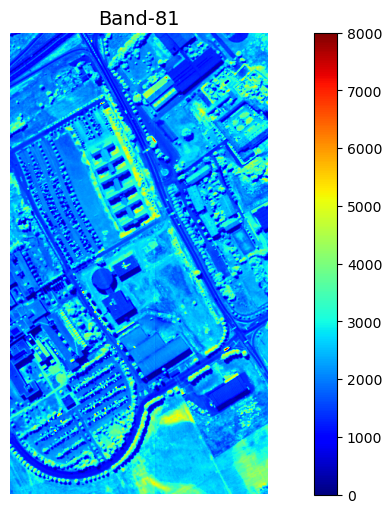

In [18]:
plot_band(X)

### 5. Visualizing ground truth of the image.

* The below code snippet plots the ground truth of the indian pines dataset.

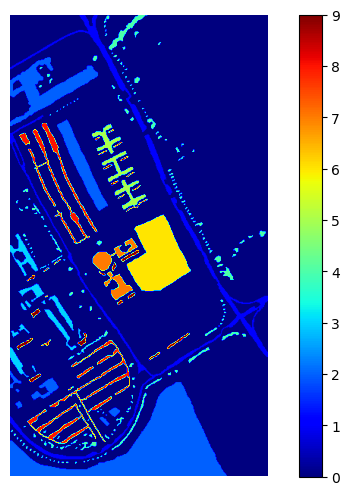

In [19]:
plt.figure(figsize=(8, 6))
plt.imshow(y, cmap='jet')
plt.axis('off')
plt.colorbar(ticks= range(0,16))
plt.show()

### 6. Extracting pixels of the HSI

The below function is used to extrac the pixels and class labels of the hyperspectral image.

In [20]:
!pip install tqdm

In [21]:
from tqdm import tqdm
import pandas as pd
def extract_pixels(X,y):
    df = pd.DataFrame()
    for i in tqdm(range(X.shape[2])):
        df = pd.concat([df, pd.DataFrame(X[:, :, i].ravel())], axis=1)
    df = pd.concat([df, pd.DataFrame(y.ravel())], axis=1)
    df.columns = [f'band-{i}' for i in range(1, 1+X.shape[2])]+['class']
    return df
        

In [22]:
df = extract_pixels(X,y)

100%|███████████████████████████████████████████████████████████████████████████████| 103/103 [00:00<00:00, 112.06it/s]


In [27]:
df.head()

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-95,band-96,band-97,band-98,band-99,band-100,band-101,band-102,band-103,class
0,647,499,464,371,291,319,365,322,296,305,...,3416,3335,3256,3226,3205,3210,3221,3238,3250,0
1,604,546,527,455,378,377,336,314,324,329,...,2583,2538,2509,2511,2501,2468,2442,2464,2528,0
2,621,746,556,360,285,300,274,276,332,319,...,2288,2242,2193,2202,2225,2266,2308,2345,2361,0
3,637,592,482,556,508,284,178,198,193,224,...,2675,2609,2541,2551,2571,2569,2573,2620,2644,0
4,625,560,480,360,377,341,264,208,231,266,...,2392,2344,2289,2328,2415,2424,2386,2431,2456,0


Saving the data to a **csv** file.

In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207400 entries, 0 to 207399
Columns: 104 entries, band-1 to class
dtypes: uint16(103), uint8(1)
memory usage: 40.9 MB


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
band-1,207400.0,925.324995,444.427499,0.0,649.0,857.0,1111.0,8000.0
band-2,207400.0,850.237584,468.464292,0.0,555.0,762.0,1046.0,8000.0
band-3,207400.0,800.363558,493.590158,0.0,483.0,694.0,1015.0,8000.0
band-4,207400.0,809.889783,527.235307,0.0,473.0,690.0,1036.0,8000.0
band-5,207400.0,830.085950,555.419089,0.0,480.0,693.0,1058.0,8000.0
...,...,...,...,...,...,...,...,...
band-100,207400.0,2231.822647,827.403828,140.0,1685.0,2231.0,2683.0,8000.0
band-101,207400.0,2224.744884,827.257369,0.0,1675.0,2226.0,2677.0,8000.0
band-102,207400.0,2236.901707,834.092348,134.0,1682.0,2244.0,2692.0,8000.0
band-103,207400.0,2253.451692,844.165146,0.0,1692.0,2261.0,2715.0,8000.0


In [31]:
df.to_csv('Dataset.csv', index=False)

### 7. Visualizing spectral signatures

The below function plots the spectral signature.

In [40]:
#def plot_signature(df):
#   plt.figure(figsize=(12, 6))
#   pixel_no = np.random.randint(df.shape[0])
#   plt.plot(range(1, 201), df.iloc[pixel_no, :-1].values.tolist(), 'b--', label= f'Class - {df.iloc[pixel_no, -1]}')
#   plt.legend()
#   plt.title(f'Pixel({pixel_no}) signature', fontsize=14)
#   plt.xlabel('Band Number', fontsize=14)
#   plt.ylabel('Pixel Intensity', fontsize=14)
#   plt.show()
    

In [ ]:
import matplotlib.pyplot as plt

# df değişkenindeki verileri çizdirelim
plt.figure(figsize=(10,6))
for i in range(df.shape[1]):
    plt.plot(df.iloc[:, i], label=f'Band {i+1}')  # df.iloc[:, i] kullanıldı

plt.xlabel('Pixel')
plt.ylabel('Intensity')
plt.title('Hiperspektral Görüntünün Spektral İmzası')
# plt.legend(loc='bottom')
plt.show()